##  MS BIKES 2 Projects 
### Akanksha Jain

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("/Users/akanksha/Documents/code/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### Setup

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# pandas imports
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_columns', None) # enables showing all columns
pd.options.display.max_rows = 100
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.notebook_repr_html = True
np.set_printoptions(precision=4, suppress=True)
    
# seaborn imports
import seaborn as sns
sns.set(color_codes=True)

# bokeh imports
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') #enable if needed to see the warning the first time.

## Bike MS 
Bike MS is National MS Society’s largest fundraising campaign, engaging over 70,000 participants to raise $68 million in over 75 rides across the country. It is the largest charity cycling series in the United States.

The rides are typically one- or two-day events that are a reasonable driving distance within metropolitan areas and are fully supported with first aid, mechanics, rest areas, shuttles, and more. When not on the route, activity is centered in a “village” atmosphere where participants have access to vendors, dining, beer gardens, camping (in some locations), team tents, and entertainment. The routes themselves range from 10 to 100 miles per day and cyclists can decide for themselves which route to ride.

The events are team-focused, with teams responsible for 87% of fundraising. Because of participant demographics (mostly male, middle age, higher income earners),Bike MS is an ideal corporate event and that corporate teams of 10 or more cyclists are seven times more valuable than any other kind of team. Companies with a large professional employee base, especially those with a corporate culture of health and wellness – regardless of industry – are key prospects.

Over the years, the charity cycling space has become very crowded with many events vying for the same audience. Bike MS participation and revenue have seen a steady decline since the peak in 2012. While retention is relatively high – over 50% – there are not enough new participants joining the series to reverse the damage caused by attrition. 

## The project is to predict whether teams will be able to meet their goal of raising funds and the different factors that impact it. 

In [3]:
df = pd.read_csv("2013-2017 Bike Teams.csv")
df.head()

,Event Type,Internal Event Name,Event ID,Team ID,Team Name,Team Creation Date,Team Captain Contact ID,Captain Email Domain,Team Captain Accept Email,Team Division,Company,Number of Participants,Total Fees Paid,Team Total Confirmed ($),Total Online Gifts($),Total Offline Confirmed Gifts($),Total Offline Unconfirmed Gifts($),Team Goal($),Total Confirmed Gifts in Team History($),Previous Event Fiscal Year,Previous Event Internal Name,Previous Event Team Name,Previous Event Confirmed Gifts($),Previous Event Team Members,Event Date,Fiscal Year
0,Bike,2013 Bike MS Hawaii,21136,320012,AKAMAI HAWAII,1/13/2013 0:38,9560000,gmail.com,TRUE,Ohana,Akamai Hawaii,8,60.0,4551,3256.0,1295.0,575.0,1500.0,4551.0,NaN,NaN,NaN,0.0,0,8/3/2013 15:57,2013.0
1,Bike,2013 Bike MS Hawaii,21136,344048,Are We There Yet?,4/16/2013 21:02,11751773,gmail.com,TRUE,Ohana,NaN,3,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,8/3/2013 15:57,2013.0
2,Bike,2013 Bike MS Hawaii,21136,351448,Big Island Honda,7/29/2013 16:47,12450037,fjhawaii.com,TRUE,Corporate,NaN,1,30.0,35,35.0,0.0,0.0,0.0,35.0,NaN,NaN,NaN,0.0,0,8/3/2013 15:57,2013.0
3,Bike,2013 Bike MS Hawaii,21136,350109,"Club Rehab, Team FTC",6/25/2013 21:07,12425732,gmail.com,TRUE,Ohana,Club Rehab,1,30.0,505,355.0,150.0,0.0,500.0,505.0,NaN,NaN,NaN,0.0,0,8/3/2013 15:57,2013.0
4,Bike,2013 Bike MS Hawaii,21136,349891,Kelsie's Team,6/20/2013 12:16,10726754,yahoo.com,TRUE,Ohana,NaN,8,240.0,5065,3810.0,1255.0,460.0,2500.0,5065.0,NaN,NaN,NaN,0.0,0,8/3/2013 15:57,2013.0


In [4]:
np.random.seed(42)

In [5]:
df.describe()

,Event ID,Team ID,Number of Participants,Total Fees Paid,Total Online Gifts($),Total Offline Confirmed Gifts($),Total Offline Unconfirmed Gifts($),Team Goal($),Total Confirmed Gifts in Team History($),Previous Event Fiscal Year,Previous Event Confirmed Gifts($),Fiscal Year
count,33132.000000,33132.000000,33132.000000,33132.000000,33132.000000,33132.000000,33132.000000,3.313200e+04,3.313000e+04,8500.000000,3.313200e+04,33130.000000
mean,24480.767777,411722.021248,10.703429,440.122936,6320.982646,2682.458385,101.641363,6.945165e+04,1.665778e+04,2014.977882,3.677016e+03,2014.938424
std,3081.189125,67696.166584,21.694745,1512.024337,19529.447014,10539.768813,792.613367,7.769344e+06,6.292724e+04,1.220864,2.087463e+04,1.419012
min,17966.000000,266344.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2011.000000,0.000000e+00,2013.000000
25%,22247.000000,353140.500000,2.000000,55.000000,405.000000,0.000000,0.000000,0.000000e+00,8.850000e+02,2015.000000,0.000000e+00,2014.000000
50%,25096.000000,405873.500000,5.000000,140.000000,1600.000000,350.000000,0.000000,2.000000e+03,3.066000e+03,2015.000000,0.000000e+00,2015.000000
75%,27091.000000,466838.250000,10.000000,340.000000,4920.962500,1571.000000,0.000000,5.000000e+03,1.066500e+04,2016.000000,0.000000e+00,2016.000000
max,29050.000000,538680.000000,725.000000,71200.000000,751129.190000,498352.720000,39638.000000,1.000000e+09,2.650325e+06,2016.000000,1.249482e+06,2018.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33132 entries, 0 to 33131
Data columns (total 26 columns):
Event Type                                  33132 non-null object
Internal Event Name                         33132 non-null object
Event ID                                    33132 non-null int64
Team ID                                     33132 non-null int64
Team Name                                   33131 non-null object
Team Creation Date                          33132 non-null object
Team Captain Contact ID                     32580 non-null object
Captain Email Domain                        32434 non-null object
Team Captain Accept Email                   32580 non-null object
Team Division                               30469 non-null object
Company                                     9967 non-null object
Number of Participants                      33132 non-null int64
Total Fees Paid                             33132 non-null float64
Team Total Confirmed ($)            

# Data Cleaning

Replace space in column names with "_" and removing ($)

In [7]:
df.columns = df.columns.str.replace(" ","_")

In [8]:
df = df.rename(columns={'Team_Total_Confirmed_($)': 'Team_Total_Confirmed', 
                        'Total_Online_Gifts($)': 'Total_Online_Gifts',
                        'Total_Offline_Confirmed_Gifts($)': 'Total_Offline_Confirmed_Gifts', 
                        'Total_Offline_Unconfirmed_Gifts($)': 'Total_Offline_Unconfirmed_Gifts',
                        'Team_Goal($)': 'Team_Goal', 
                        'Total_Confirmed_Gifts_in_Team_History($)': 'Total_Confirmed_Gifts_in_Team_History',
                        'Previous_Event_Confirmed_Gifts($)': 'Previous_Event_Confirmed_Gifts'
                       })

Convert column 'Team_Total_Confirmed' into float. Deleted a row with invalid cell values

In [9]:
df.loc[df['Team_Total_Confirmed'] == '520(450']
df=df.drop(df.index[29752])
df = df.astype({'Team_Total_Confirmed': 'float'})

Dropped rows with ID values.There are mutliple identifiers for event and teams, dropping all but one for each. And also irrevelant demograhic columns, phone, email, contact-id etc have been dropped.

In [10]:
df_new = df.drop(['Event_Type','Internal_Event_Name','Event_ID','Team_Name','Team_Creation_Date','Team_Captain_Contact_ID','Captain_Email_Domain','Previous_Event_Internal_Name','Previous_Event_Team_Name','Event_Date'],axis=1)

In [11]:
df_new.head()

,Team_ID,Team_Captain_Accept_Email,Team_Division,Company,Number_of_Participants,Total_Fees_Paid,Team_Total_Confirmed,Total_Online_Gifts,Total_Offline_Confirmed_Gifts,Total_Offline_Unconfirmed_Gifts,Team_Goal,Total_Confirmed_Gifts_in_Team_History,Previous_Event_Fiscal_Year,Previous_Event_Confirmed_Gifts,Previous_Event_Team_Members,Fiscal_Year
0,320012,TRUE,Ohana,Akamai Hawaii,8,60.0,4551.0,3256.0,1295.0,575.0,1500.0,4551.0,NaN,0.0,0,2013.0
1,344048,TRUE,Ohana,NaN,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,2013.0
2,351448,TRUE,Corporate,NaN,1,30.0,35.0,35.0,0.0,0.0,0.0,35.0,NaN,0.0,0,2013.0
3,350109,TRUE,Ohana,Club Rehab,1,30.0,505.0,355.0,150.0,0.0,500.0,505.0,NaN,0.0,0,2013.0
4,349891,TRUE,Ohana,NaN,8,240.0,5065.0,3810.0,1255.0,460.0,2500.0,5065.0,NaN,0.0,0,2013.0


In [12]:
# Identify columns with null values
df_new.isnull().sum()

Team_ID                                      0
Team_Captain_Accept_Email                  552
Team_Division                             2663
Company                                  23164
Number_of_Participants                       0
Total_Fees_Paid                              0
Team_Total_Confirmed                         0
Total_Online_Gifts                           0
Total_Offline_Confirmed_Gifts                0
Total_Offline_Unconfirmed_Gifts              0
Team_Goal                                    0
Total_Confirmed_Gifts_in_Team_History        1
Previous_Event_Fiscal_Year               24631
Previous_Event_Confirmed_Gifts               0
Previous_Event_Team_Members                  0
Fiscal_Year                                  1
dtype: int64

Convert company into values of 1(company name present) and 0(no company)


In [13]:
df_new['Company'].loc[~df['Company'].isnull()] =1
df_new['Company'].loc[df['Company'].isnull()] = 0
df_new.Company.value_counts()

0    23164
1     9967
Name: Company, dtype: int64

In [14]:
# Replacing/ deleting Null values
df_new['Team_Captain_Accept_Email'].fillna(df_new['Team_Captain_Accept_Email'].mode() , inplace=True)
df_new['Team_Division'].replace(np.NaN, 'Other', inplace=True)
df_new['Previous_Event_Fiscal_Year'].replace(np.NaN, 0, inplace=True)
df_new['Total_Confirmed_Gifts_in_Team_History'].replace(np.NaN, df_new.Team_Total_Confirmed , inplace=True)
df_new.dropna(how='any', inplace=True)
df_new.isnull().sum()

Team_ID                                  0
Team_Captain_Accept_Email                0
Team_Division                            0
Company                                  0
Number_of_Participants                   0
Total_Fees_Paid                          0
Team_Total_Confirmed                     0
Total_Online_Gifts                       0
Total_Offline_Confirmed_Gifts            0
Total_Offline_Unconfirmed_Gifts          0
Team_Goal                                0
Total_Confirmed_Gifts_in_Team_History    0
Previous_Event_Fiscal_Year               0
Previous_Event_Confirmed_Gifts           0
Previous_Event_Team_Members              0
Fiscal_Year                              0
dtype: int64

In [15]:
df_new['Team_Captain_Accept_Email']=df_new['Team_Captain_Accept_Email'].astype(str)
df_new['Team_Captain_Accept_Email']=df_new['Team_Captain_Accept_Email'].str.lower()
df_new['Team_Captain_Accept_Email'].value_counts()

true     24522
false     8056
Name: Team_Captain_Accept_Email, dtype: int64

Creating three categories for Division 

In [16]:
df_new.Team_Division.replace('Family and Friends','Friends and Family',inplace=True)
df_new.Team_Division.replace('Friend and Family','Friends and Family',inplace=True)
df_new.Team_Division.replace('Family/Friends','Friends and Family',inplace=True)
df_new.Team_Division.replace('Frien`s and Family','Friends and Family',inplace=True)
df_new.Team_Division.replace('Organization (Clubs, Civic Groups, etc.)','Other',inplace=True)
df_new.Team_Division.replace('Organization (Clubs; Civic Groups; Place of Worship; etc.)','Other',inplace=True)
df_new.Team_Division.replace('Organization','Other',inplace=True)
df_new.Team_Division.replace('Place of worship','Other',inplace=True)
df_new.Team_Division.replace('Club/Organization','Other',inplace=True)
df_new.Team_Division.replace('Civic Team','Other',inplace=True)
df_new.Team_Division.replace('Bike Club','Other',inplace=True)
df_new.Team_Division.replace('Religious','Other',inplace=True)
df_new.Team_Division.replace('Place of Worship','Other',inplace=True)
df_new.Team_Division.replace('Organization (Clubs; Civic Groups; etc.)','Other',inplace=True)
df_new.Team_Division.replace('School','Other',inplace=True)
df_new.Team_Division.replace('Bike Shop','Other',inplace=True)
df_new.Team_Division.replace('Ohana and Friends','Other',inplace=True)
df_new.Team_Division.replace('Ohana ','Other',inplace=True)
df_new.Team_Division.replace('Small Business','Other',inplace=True)
df_new.Team_Division.replace('School ','Other',inplace=True)
df_new.Team_Division.replace('Beer/Brewery','Other',inplace=True)
df_new.Team_Division.replace('Volunteer Group','Other',inplace=True)
df_new.Team_Division.replace('Open','Other',inplace=True)
df_new.Team_Division.replace('Open Team','Other',inplace=True)
df_new.Team_Division.replace('Association','Other',inplace=True)
df_new.Team_Division.replace('Bike Shops','Other',inplace=True)
df_new.Team_Division.replace('Corporation','Corporate',inplace=True)
df_new.Team_Division.value_counts()

Friends and Family    21372
Corporate              7566
Other                  3640
Name: Team_Division, dtype: int64

In [17]:
df_new.head()

,Team_ID,Team_Captain_Accept_Email,Team_Division,Company,Number_of_Participants,Total_Fees_Paid,Team_Total_Confirmed,Total_Online_Gifts,Total_Offline_Confirmed_Gifts,Total_Offline_Unconfirmed_Gifts,Team_Goal,Total_Confirmed_Gifts_in_Team_History,Previous_Event_Fiscal_Year,Previous_Event_Confirmed_Gifts,Previous_Event_Team_Members,Fiscal_Year
0,320012,true,Other,1,8,60.0,4551.0,3256.0,1295.0,575.0,1500.0,4551.0,0.0,0.0,0,2013.0
1,344048,true,Other,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2013.0
2,351448,true,Corporate,0,1,30.0,35.0,35.0,0.0,0.0,0.0,35.0,0.0,0.0,0,2013.0
3,350109,true,Other,1,1,30.0,505.0,355.0,150.0,0.0,500.0,505.0,0.0,0.0,0,2013.0
4,349891,true,Other,0,8,240.0,5065.0,3810.0,1255.0,460.0,2500.0,5065.0,0.0,0.0,0,2013.0


In [18]:
# Converting Previous_Event_Fiscal_Year into values of 1(participated in the previous year) and 0(did'nt participate inthe previous year)
df_new['Previous_Event_Fiscal_Year'].loc[~df['Previous_Event_Fiscal_Year'].isnull()] =1
df_new['Previous_Event_Fiscal_Year'].loc[df['Previous_Event_Fiscal_Year'].isnull()] = 0
df_new.Previous_Event_Fiscal_Year.value_counts()

0.0    24630
1.0     7948
Name: Previous_Event_Fiscal_Year, dtype: int64

Created a column called "achvmnt" - says whether the team has met it's goal or not - we will be suing this column as the output variable


In [19]:
df_new['achvmnt']=df_new['Team_Total_Confirmed']-df_new['Team_Goal']
df_new.head()

,Team_ID,Team_Captain_Accept_Email,Team_Division,Company,Number_of_Participants,Total_Fees_Paid,Team_Total_Confirmed,Total_Online_Gifts,Total_Offline_Confirmed_Gifts,Total_Offline_Unconfirmed_Gifts,Team_Goal,Total_Confirmed_Gifts_in_Team_History,Previous_Event_Fiscal_Year,Previous_Event_Confirmed_Gifts,Previous_Event_Team_Members,Fiscal_Year,achvmnt
0,320012,true,Other,1,8,60.0,4551.0,3256.0,1295.0,575.0,1500.0,4551.0,0.0,0.0,0,2013.0,3051.0
1,344048,true,Other,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2013.0,0.0
2,351448,true,Corporate,0,1,30.0,35.0,35.0,0.0,0.0,0.0,35.0,0.0,0.0,0,2013.0,35.0
3,350109,true,Other,1,1,30.0,505.0,355.0,150.0,0.0,500.0,505.0,0.0,0.0,0,2013.0,5.0
4,349891,true,Other,0,8,240.0,5065.0,3810.0,1255.0,460.0,2500.0,5065.0,0.0,0.0,0,2013.0,2565.0


In [20]:
df_new = df_new.astype({'achvmnt': 'float'})
# Assigning Value 1 if achvmnt >= 0, else 0
df_new['achvmnt'] = df_new['achvmnt'].apply(lambda x: 1 if 0 <=  x else 0)

In [21]:
df_new.head()

,Team_ID,Team_Captain_Accept_Email,Team_Division,Company,Number_of_Participants,Total_Fees_Paid,Team_Total_Confirmed,Total_Online_Gifts,Total_Offline_Confirmed_Gifts,Total_Offline_Unconfirmed_Gifts,Team_Goal,Total_Confirmed_Gifts_in_Team_History,Previous_Event_Fiscal_Year,Previous_Event_Confirmed_Gifts,Previous_Event_Team_Members,Fiscal_Year,achvmnt
0,320012,true,Other,1,8,60.0,4551.0,3256.0,1295.0,575.0,1500.0,4551.0,0.0,0.0,0,2013.0,1
1,344048,true,Other,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2013.0,1
2,351448,true,Corporate,0,1,30.0,35.0,35.0,0.0,0.0,0.0,35.0,0.0,0.0,0,2013.0,1
3,350109,true,Other,1,1,30.0,505.0,355.0,150.0,0.0,500.0,505.0,0.0,0.0,0,2013.0,1
4,349891,true,Other,0,8,240.0,5065.0,3810.0,1255.0,460.0,2500.0,5065.0,0.0,0.0,0,2013.0,1


## Plotting the correlation matrix

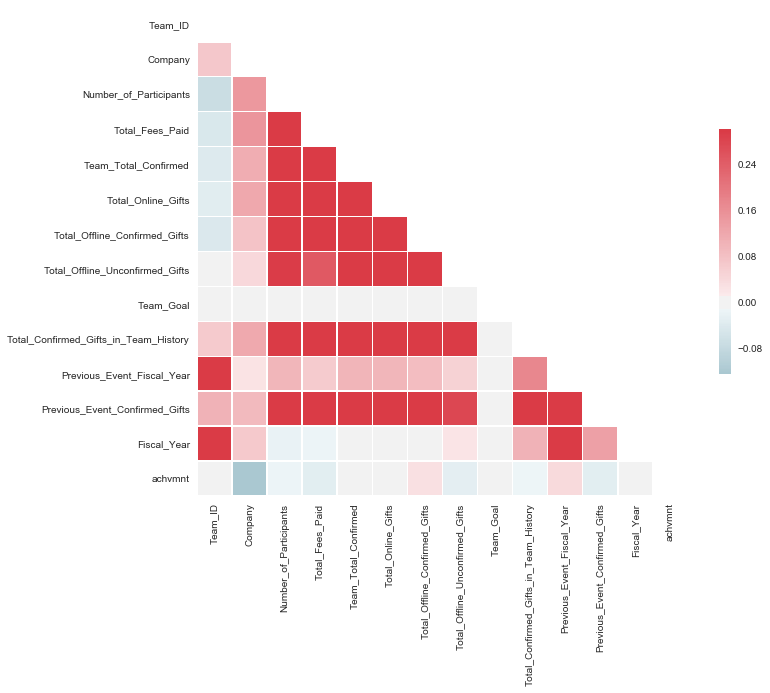

In [22]:
from string import ascii_letters
import matplotlib.pyplot as plt
sns.set(style="white")

# Compute the correlation matrix
corr = df_new.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,linewidths=.5, cbar_kws={"shrink": .5})

Dropping highly correlated variables

In [23]:
df_new = df_new.drop(['Team_ID','Team_Goal','Total_Fees_Paid','Team_Total_Confirmed','Total_Online_Gifts','Total_Offline_Confirmed_Gifts','Total_Offline_Unconfirmed_Gifts','Total_Confirmed_Gifts_in_Team_History'],axis=1)
df_new.head()

,Team_Captain_Accept_Email,Team_Division,Company,Number_of_Participants,Previous_Event_Fiscal_Year,Previous_Event_Confirmed_Gifts,Previous_Event_Team_Members,Fiscal_Year,achvmnt
0,true,Other,1,8,0.0,0.0,0,2013.0,1
1,true,Other,0,3,0.0,0.0,0,2013.0,1
2,true,Corporate,0,1,0.0,0.0,0,2013.0,1
3,true,Other,1,1,0.0,0.0,0,2013.0,1
4,true,Other,0,8,0.0,0.0,0,2013.0,1


In [24]:
df_new['Company']=(df_new['Company']).astype('category')
df_new.head()

,Team_Captain_Accept_Email,Team_Division,Company,Number_of_Participants,Previous_Event_Fiscal_Year,Previous_Event_Confirmed_Gifts,Previous_Event_Team_Members,Fiscal_Year,achvmnt
0,true,Other,1,8,0.0,0.0,0,2013.0,1
1,true,Other,0,3,0.0,0.0,0,2013.0,1
2,true,Corporate,0,1,0.0,0.0,0,2013.0,1
3,true,Other,1,1,0.0,0.0,0,2013.0,1
4,true,Other,0,8,0.0,0.0,0,2013.0,1


# Prepare the data for Machine Learning algorithms

In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_new, test_size=0.2, random_state=42)

In [26]:
bike=train_set.copy()

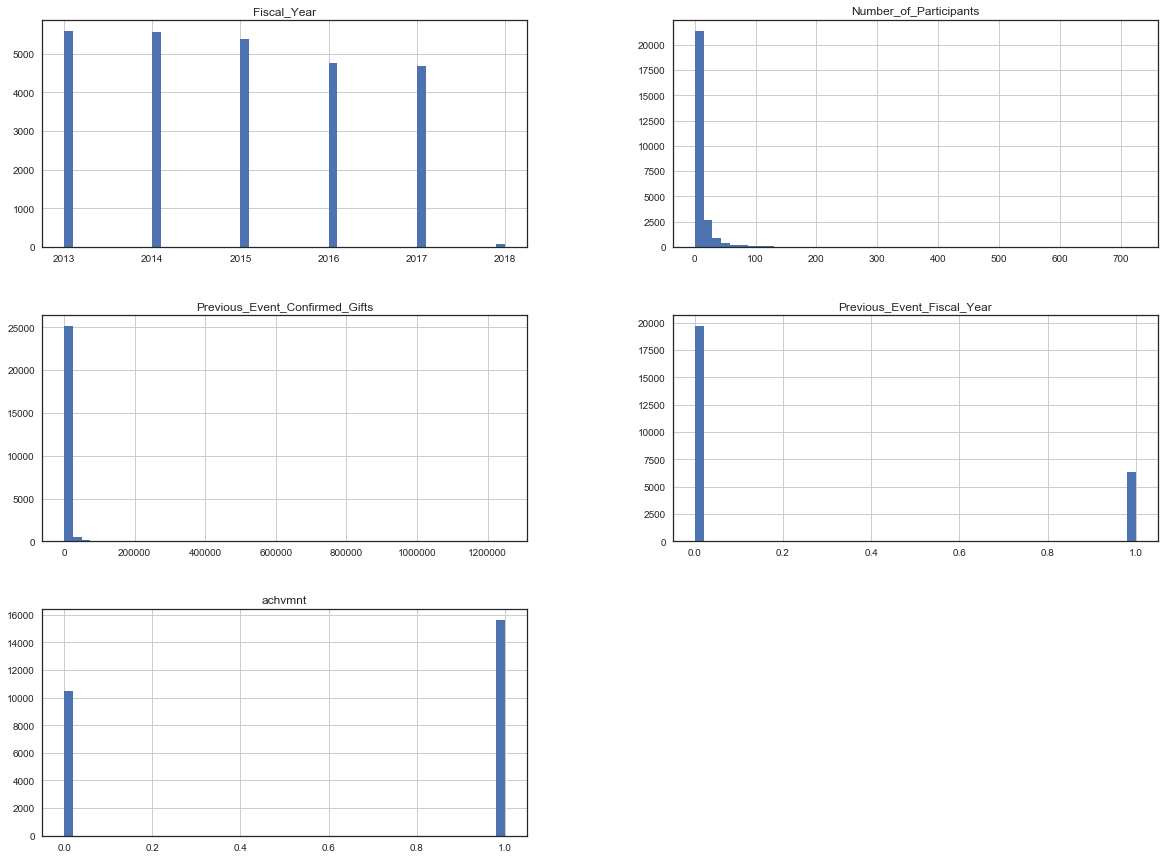

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
bike.hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
corr_matrix = bike.corr()
corr_matrix

,Number_of_Participants,Previous_Event_Fiscal_Year,Previous_Event_Confirmed_Gifts,Fiscal_Year,achvmnt
Number_of_Participants,1.000000,0.094744,0.458281,-0.019269,-0.012425
Previous_Event_Fiscal_Year,0.094744,1.000000,0.300018,0.418280,0.039175
Previous_Event_Confirmed_Gifts,0.458281,0.300018,1.000000,0.126966,-0.028946
Fiscal_Year,-0.019269,0.418280,0.126966,1.000000,-0.013142
achvmnt,-0.012425,0.039175,-0.028946,-0.013142,1.000000


In [29]:
bike = train_set.drop("achvmnt", axis=1)

In [30]:
bike_labels = train_set["achvmnt"].copy()

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bike_labels = le.fit_transform(train_set["achvmnt"])

In [32]:
bike_labels

array([1, 0, 0, ..., 1, 1, 1])

In [33]:
le.inverse_transform(bike_labels)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 0, 0, ..., 1, 1, 1])

In [34]:
list(le.classes_)

[0, 1]

## Handling Text and Categorical Attributes

In [35]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
   
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [36]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26062 entries, 24486 to 23733
Data columns (total 8 columns):
Team_Captain_Accept_Email         26062 non-null object
Team_Division                     26062 non-null object
Company                           26062 non-null category
Number_of_Participants            26062 non-null int64
Previous_Event_Fiscal_Year        26062 non-null float64
Previous_Event_Confirmed_Gifts    26062 non-null float64
Previous_Event_Team_Members       26062 non-null object
Fiscal_Year                       26062 non-null float64
dtypes: category(1), float64(3), int64(1), object(3)
memory usage: 1.6+ MB


In [37]:
bike_Team_Captain_Accept_Email=bike['Team_Captain_Accept_Email']

In [38]:
cat_encoder = CategoricalEncoder()
bike_Team_Captain_Accept_Email_reshaped = bike_Team_Captain_Accept_Email .values.reshape(-1, 1)
bike_Team_Captain_Accept_Email_1hot = cat_encoder.fit_transform(bike_Team_Captain_Accept_Email_reshaped)
bike_Team_Captain_Accept_Email_1hot 

<26062x2 sparse matrix of type '<class 'numpy.float64'>'
	with 26062 stored elements in Compressed Sparse Row format>

In [39]:
bike_Team_Captain_Accept_Email_1hot.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [40]:
cat_encoder.categories_

[array(['false', 'true'], dtype=object)]

In [41]:
bike['Company']=bike['Company'].astype('int')
bike['Previous_Event_Team_Members']=bike['Previous_Event_Team_Members'].astype('int')

In [42]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26062 entries, 24486 to 23733
Data columns (total 8 columns):
Team_Captain_Accept_Email         26062 non-null object
Team_Division                     26062 non-null object
Company                           26062 non-null int64
Number_of_Participants            26062 non-null int64
Previous_Event_Fiscal_Year        26062 non-null float64
Previous_Event_Confirmed_Gifts    26062 non-null float64
Previous_Event_Team_Members       26062 non-null int64
Fiscal_Year                       26062 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.8+ MB


In [43]:
bike_cat = bike.select_dtypes(include=[np.object])
bike_cat.head()

,Team_Captain_Accept_Email,Team_Division
24486,true,Other
28680,true,Corporate
1338,true,Corporate
7047,true,Corporate
8225,true,Corporate


In [44]:
bike_num = bike.select_dtypes(include=[np.number])
bike_num.head()

,Company,Number_of_Participants,Previous_Event_Fiscal_Year,Previous_Event_Confirmed_Gifts,Previous_Event_Team_Members,Fiscal_Year
24486,0,3,1.0,2140.0,3,2016.0
28680,1,4,1.0,3800.0,5,2017.0
1338,1,19,0.0,0.0,0,2013.0
7047,1,13,0.0,0.0,0,2014.0
8225,1,6,0.0,0.0,0,2014.0


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        #('imputer', Imputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

bike_num_tr = num_pipeline.fit_transform(bike_num)

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [47]:
num_attribs = list(bike_num)
cat_attribs = list(bike_cat)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        #('imputer', Imputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

#Each pipeline creates separate results

In [48]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

# FeatureUnion joins both the pipleines column-wise

In [49]:
bike_prepared = full_pipeline.fit_transform(bike)

In [50]:
bike_prepared

array([[-0.6581, -0.3552,  1.7645, ...,  0.    ,  0.    ,  1.    ],
       [ 1.5196, -0.3104,  1.7645, ...,  1.    ,  0.    ,  0.    ],
       [ 1.5196,  0.3601, -0.5667, ...,  1.    ,  0.    ,  0.    ],
       ...,
       [-0.6581, -0.3999, -0.5667, ...,  0.    ,  1.    ,  0.    ],
       [-0.6581, -0.3552, -0.5667, ...,  0.    ,  1.    ,  0.    ],
       [ 1.5196, -0.1763, -0.5667, ...,  1.    ,  0.    ,  0.    ]])

In [51]:
bike_prepared.shape

(26062, 11)

In [52]:
cat_encoder = CategoricalEncoder(encoding="onehot-dense")

In [53]:
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs_1 = list(cat_encoder.categories_[0])
cat_one_hot_attribs_1
# finding catogor

['false', 'true']

In [54]:
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs_2 = list(cat_encoder.categories_[1])
cat_one_hot_attribs_2

['Corporate', 'Friends and Family', 'Other']

# Select and train a model 

In [55]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [56]:
from sklearn.linear_model import SGDClassifier

## works with scikit-learn 0.19.1
#sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(bike_prepared, bike_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [57]:
some_bike = bike_prepared[1000,:]
some_bike

array([ 1.5196, -0.2657, -0.5667, -0.17  , -0.2478, -1.3528,  1.    ,
        0.    ,  0.    ,  1.    ,  0.    ])

In [58]:
some_bike_label = bike_labels[1000]
some_bike_label

0

In [59]:
sgd_clf.predict([some_bike])

array([0])

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, bike_prepared, bike_labels, cv=5, scoring="accuracy")

array([0.5329, 0.5947, 0.5951, 0.481 , 0.5085])

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5, random_state=42)

for train_index, test_index in skfolds.split(bike_prepared, bike_labels):
    clone_clf = clone(sgd_clf)
    X_train_folds = bike_prepared[train_index]
    y_train_folds = (bike_labels[train_index])
    X_test_fold = bike_prepared[test_index]
    y_test_fold = (bike_labels[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.5328985229234606
0.5946671782083254
0.5950508344523308
0.4810053722179586
0.5085396277106121


In [62]:
print('train', len(train_index), 'test', len(test_index))

train 20851 test 5211


In [63]:
from sklearn.base import BaseEstimator
class AllZerosClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [64]:
all_0_clf = AllZerosClassifier()
cross_val_score(all_0_clf, bike_prepared, bike_labels, cv=5, scoring="accuracy")

array([0.398 , 0.4046, 0.4075, 0.3927, 0.4045])

In [65]:
from sklearn.base import BaseEstimator
class AllOnesClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.ones((len(X), 1), dtype=bool)

In [66]:
all_1_clf = AllOnesClassifier()
cross_val_score(all_1_clf, bike_prepared, bike_labels, cv=5, scoring="accuracy")

array([0.602 , 0.5954, 0.5925, 0.6073, 0.5955])

-  SGD Classifier<br>
5 fold CV Accuracy<br>
0.5329, 0.5947, 0.5951, 0.481 , 0.5085<br>


-  All Zeros Classifier<br>
5 fold CV Accuracy<br>
0.398 , 0.4046, 0.4075, 0.3927, 0.4045<br>


-  All Ones Classifier<br>
5 fold CV Accuracy<br>
0.602 , 0.5954, 0.5925, 0.6073, 0.5955<br>

### Confusion Matrix


In [67]:
from sklearn.model_selection import cross_val_predict

bike_labels_pred = cross_val_predict(sgd_clf, bike_prepared, bike_labels, cv=5)

In [68]:
bike_labels_pred

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(bike_labels, bike_labels_pred)

array([[ 3272,  7191],
       [ 4734, 10865]])

In [70]:
conf_mx = confusion_matrix(bike_labels, bike_labels_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

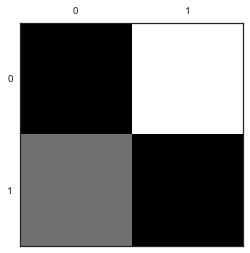

In [71]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [72]:
tn, fp, fn, tp = confusion_matrix(bike_labels, bike_labels_pred).ravel()

In [73]:
print("True Positives  (TP): ", tp)
print("False Positives (FP): ", fp)
print("True Negatives  (TN): ", tn)
print("False Negatives (FN): ", fn)

True Positives  (TP):  10865
False Positives (FP):  7191
True Negatives  (TN):  3272
False Negatives (FN):  4734


In [74]:
bike_labels_perfect_predictions = bike_labels

confusion_matrix(bike_labels, bike_labels_perfect_predictions)

array([[10463,     0],
       [    0, 15599]])

In [75]:
from sklearn.metrics import precision_score, recall_score

precision_score(bike_labels, bike_labels_pred)

0.6017390341160833

In [76]:
precision = tp/(tp+fp)
precision

0.6017390341160833

In [77]:
recall_score(bike_labels, bike_labels_pred)

0.6965190076286941

In [78]:
recall = tp/(tp+fn)
recall

0.6965190076286941

In [79]:
from sklearn.metrics import f1_score
f1_score(bike_labels, bike_labels_pred)

0.6456692913385826

In [80]:
f1 = 2 * (precision * recall)/(precision + recall)
f1

0.6456692913385826

In [81]:
# predict class probabilities
y_scores = sgd_clf.decision_function([some_bike])
y_scores

array([-0.4298])

In [82]:
threshold = 0
y_some_bike_pred = (y_scores > threshold)
y_some_bike_pred

array([False])

In [83]:
threshold = -2
y_some_bike_pred = (y_scores > threshold)
y_some_bike_pred

array([ True])

In [84]:
y_scores = cross_val_predict(sgd_clf, bike_prepared, bike_labels, cv=5,
                             method="decision_function")

In [85]:
y_scores.shape

(26062,)

In [86]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [87]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(bike_labels, y_scores)

In [88]:
precisions.shape

(11218,)

In [89]:
recalls.shape

(11218,)

In [90]:
thresholds.shape

(11217,)

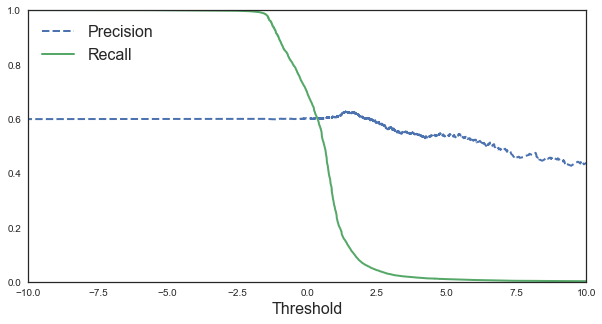

In [91]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])
plt.show()

In [92]:
y_train_pred_90 = (y_scores > 8)

In [93]:
precision_score(bike_labels, y_train_pred_90)

0.4666666666666667

In [94]:
recall_score(bike_labels, y_train_pred_90)

0.003589973716263863

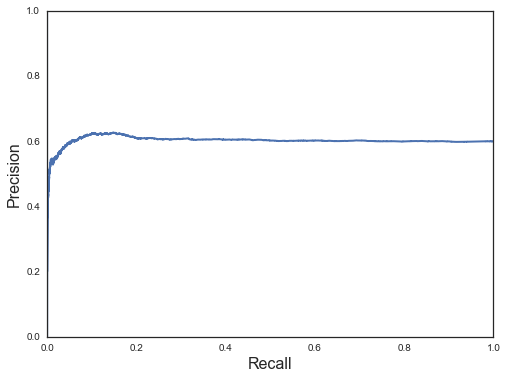

In [95]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

## ROC Curves

In [96]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(bike_labels, y_scores)

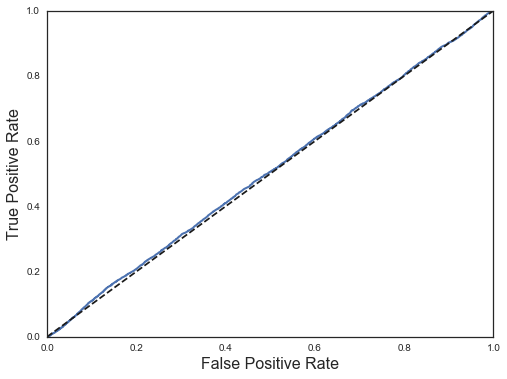

In [97]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [98]:
from sklearn.metrics import roc_auc_score

roc_auc_score(bike_labels, y_scores)

0.5062339098790063

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, bike_prepared, bike_labels, cv=5,
                                    method="predict_proba")

In [100]:
y_probas_forest

array([[0.4   , 0.6   ],
       [0.    , 1.    ],
       [0.3123, 0.6877],
       ...,
       [0.393 , 0.607 ],
       [0.4271, 0.5729],
       [0.4694, 0.5306]])

In [101]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(bike_labels,y_scores_forest)

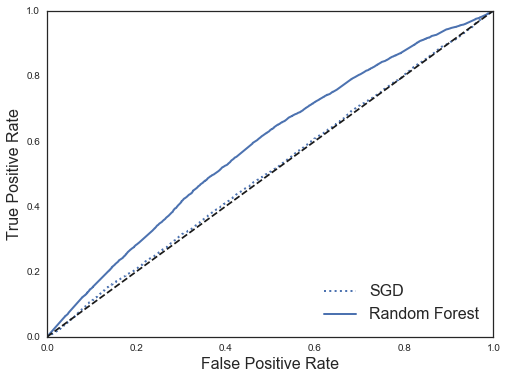

In [102]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [103]:
roc_auc_score(bike_labels, y_scores_forest)

0.5851962771662291

In [104]:
y_train_pred_forest = cross_val_predict(forest_clf, bike_prepared, bike_labels, cv=5)
precision_score(bike_labels, y_train_pred_forest)

0.6350988397077783

In [105]:
recall_score(bike_labels, y_train_pred_forest)

0.7579332008462081

In [106]:
f1_score(bike_labels, y_train_pred_forest)

0.6911003945637879

In [107]:
tn, fp, fn, tp = confusion_matrix(bike_labels, y_train_pred_forest).ravel()
print("True Positives  (TP): ", tp)
print("False Positives (FP): ", fp)
print("True Negatives  (TN): ", tn)
print("False Negatives (FN): ", fn)

True Positives  (TP):  11823
False Positives (FP):  6793
True Negatives  (TN):  3670
False Negatives (FN):  3776


In [108]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(bike_prepared, bike_labels)
y_probas_tree = cross_val_predict(tree_clf, bike_prepared, bike_labels, cv=5,
                                    method="predict_proba")

In [109]:
y_scores_tree = y_probas_tree[:, 1] # score = proba of positive class
fpr_tree, tpr_tree, thresholds_tree = roc_curve(bike_labels,y_scores_tree)

In [110]:
roc_auc_score(bike_labels, y_scores_tree)

0.5720352163084338

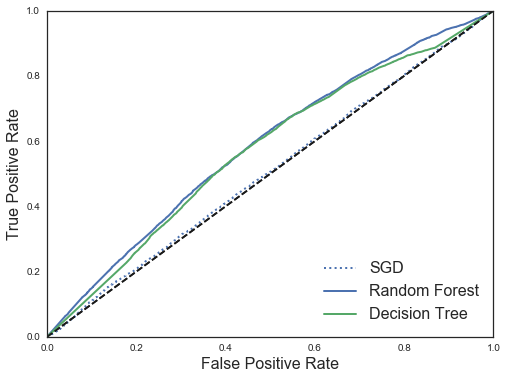

In [111]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(bike_prepared, bike_labels)
y_probas_knn = cross_val_predict(knn_clf, bike_prepared, bike_labels, cv=5,
                                    method="predict_proba")

In [113]:
y_probas_knn = y_probas_knn[:, 1] # score = proba of positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(bike_labels,y_probas_knn)

In [114]:
roc_auc_score(bike_labels, y_probas_knn)

0.5672719734415664

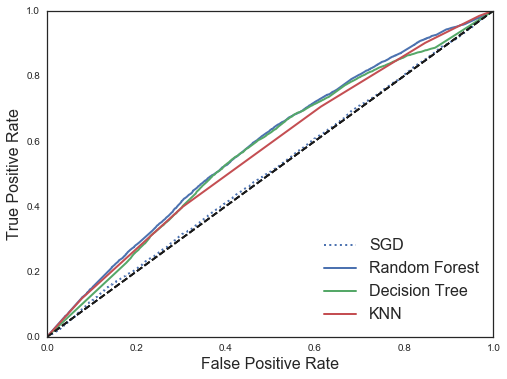

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plt.legend(loc="lower right", fontsize=16)
plt.show()

- SGM <br>
ROC AUC Score :0.5062339098790063<br>


- Random Forest Classifier<br>
**ROC AUC Score: 0.5851962771662291**<br>
Precision score:0.6350988397077783<br>
Recall Score:0.7579332008462081<br>
f1 score: 0.6911003945637879<br>
True Positives  (TP):  11823
False Positives (FP):  6793
True Negatives  (TN):  3670
False Negatives (FN):  3776


- Decision Tree Classifier<br>
ROC AUC Score:0.5720352163084338


- KNeighbors Classifier<br>
ROC AUC Score: 0.5672719734415664

# Fine-tuning model

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search_knn.fit(bike_prepared, bike_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.5526568194897372, total=   0.5s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_neighbors=3, weights=uniform, score=0.5766353347400729, total=   0.5s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  n_neighbors=3, weights=uniform, score=0.58143103779014, total=   0.5s
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.554489639293937, total=   0.5s
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.5613126079447323, total=   0.5s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=distance, score=0.5480529445616728, total=   0.5s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=distance, score=0.5722232879340111, total=   0.5s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=distance, score=0.5800882409361212, total=   0.5s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=distance, score=0.5514198004604758, total=   0.5s
[CV] n_neighbors=3, weights

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   33.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [117]:
grid_search_knn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [118]:
grid_search_knn.best_score_

0.5776225922799478

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [{'max_features': ['sqrt', 'log2']}]

forest_clf = RandomForestClassifier()
grid_search_forest = GridSearchCV(forest_clf, param_grid, cv=5, verbose=3)
grid_search_forest.fit(bike_prepared, bike_labels)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.6000383656244005, total=   0.1s
[CV] max_features=sqrt ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ...... max_features=sqrt, score=0.5992710531363898, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.5986955687703818, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.5848042977743668, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ...... max_features=sqrt, score=0.5948954135482633, total=   0.1s
[CV] max_features=log2 ...............................................
[CV] ........ max_features=log2, score=0.59428352196432, total=   0.1s
[CV] max_features=log2 ...............................................
[CV] ...... max_features=log2, score=0.6011893343564166, total=   0.1s
[CV] max_features=log2 ...............................................
[CV] ....... max_features=log2, score=0.601572990600422, total=   0.1s
[CV] max_features=log2 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': ['sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [120]:
grid_search_forest.best_params_

{'max_features': 'log2'}

In [121]:
grid_search_forest.best_score_

0.5967308725347249

In [122]:
feature_importances_forest = grid_search_forest.best_estimator_.feature_importances_
feature_importances_forest

array([0.0428, 0.406 , 0.0057, 0.2735, 0.1383, 0.0955, 0.0058, 0.0055,
       0.0081, 0.0105, 0.0083])

In [123]:
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_list = list(cat_encoder.categories_[0])
cat_list.extend(list(cat_encoder.categories_[1]))
attributes = num_attribs + cat_list
sorted(zip(feature_importances_forest, attributes), reverse=True)

[(0.406041716087429, 'Number_of_Participants'),
 (0.273456536637423, 'Previous_Event_Confirmed_Gifts'),
 (0.13829967147461988, 'Previous_Event_Team_Members'),
 (0.09546170502296772, 'Fiscal_Year'),
 (0.0427781062307485, 'Company'),
 (0.010451364728493517, 'Friends and Family'),
 (0.00829837381738914, 'Other'),
 (0.008124525400512112, 'Corporate'),
 (0.005849079065734326, 'false'),
 (0.005696430853002315, 'Previous_Event_Fiscal_Year'),
 (0.005542490681680489, 'true')]

-  KNeighborsClassifier<br>
Best Parameter N_neighbors = 5<br>
Best Score: 0.5776225922799478


-  Random Forest Classifier<br>
Max_Features: Log 2<br>
**Best Score: 0.5967308725347249**<br> 
0.40604171608742 :Number_of_Participants<br>
0.273456536637423: Previous_Event_Confirmed_Gifts<br>
0.13829967147461988: Previous_Event_Team_Members<br>

# Ensemble Models

## Voting Classifiers

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42, max_features='log2')
svm_clf = SVC(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf)],
    voting='hard')
voting_clf.fit(bike_prepared, bike_labels)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...wski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [125]:
from sklearn.model_selection import cross_val_score

cross_val_score(voting_clf, bike_prepared, bike_labels, cv=5, scoring="accuracy")

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


array([0.5995, 0.6156, 0.602 , 0.5963, 0.6049])

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf)],
    voting='soft')
voting_clf_soft.fit(bike_prepared, bike_labels)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...wski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [127]:
from sklearn.model_selection import cross_val_score

cross_val_score(voting_clf_soft, bike_prepared, bike_labels, cv=5, scoring="accuracy")

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


array([0.6068, 0.6211, 0.6058, 0.6055, 0.6143])

LogisticRegression<br>
RandomForestClassifier: Max_features log2<br>
SVC<br>
KNeighborsClassifier : n_neighbors = 5, weight = distance<br>
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf)],
    voting=**'hard'**)<br>
5 fold CV Accuracy<br>
0.5995, 0.6156, 0.602 , 0.5963, 0.6049<br>


LogisticRegression<br>
RandomForestClassifier: Max_features log2<br>
SVC<br>
KNeighborsClassifier : n_neighbors = 5, weight = distance<br>
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf)],
    voting=**'soft'**)<br>
**5 fold CV Accuracy<br>
0.6068, 0.6211, 0.6058, 0.6055, 0.6143**

## Bagging and Pasting

In [128]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(bike_prepared, bike_labels)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [129]:
from sklearn.model_selection import cross_val_score

cross_val_score(bag_clf, bike_prepared, bike_labels, cv=5, scoring="accuracy")

array([0.6219, 0.6236, 0.6167, 0.6176, 0.6266])

In [130]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(bike_prepared, bike_labels)

cross_val_score(bag_clf, bike_prepared, bike_labels, cv=5, scoring="accuracy")

array([0.6058, 0.6119, 0.6115, 0.6096, 0.621 ])

In [131]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(bike_prepared, bike_labels)

cross_val_score(rnd_clf, bike_prepared, bike_labels, cv=5, scoring="accuracy")

array([0.6185, 0.6223, 0.6175, 0.6195, 0.6264])

BaggingClassifier<br>
DecisionTreeClassifier<br>

max_samples=100<br>
**5 fold CV Accuracy<br>
0.6219, 0.6236, 0.6167, 0.6176, 0.6266<br>**

splitter="random", max_leaf_nodes=16,max_samples=1.0<br>
5 fold CV Accuracy<br>
0.6058, 0.6119, 0.6115, 0.6096, 0.621<br>

RandomForestClassifier<br>
5 fold CV Accuracy<br>
0.6185, 0.6223, 0.6175, 0.6195, 0.6264

## Boosting

> **Boosting** (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

### AdaBoost

> To build an AdaBoost classifier, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on...

In [132]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(bike_prepared, bike_labels)

cross_val_score(ada_clf, bike_prepared, bike_labels, cv=5, scoring="accuracy")

array([0.6117, 0.6236, 0.6206, 0.6178, 0.625 ])

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(
    max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
y_scores_gbc = cross_val_predict(gbc_clf, bike_prepared, bike_labels, cv=5,
                                method="decision_function")
roc_auc_score(bike_labels, y_scores_gbc)

0.6024957476100598

In [134]:
y_probas_gbc = cross_val_predict(gbc_clf, bike_prepared, bike_labels, cv=5,
                                    method="predict_proba")
roc_auc_score(bike_labels, y_probas_gbc[:,1])

0.6024957476100598

In [135]:
y_scores_gbc = y_probas_gbc[:,1] # score = proba of positive class
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(bike_labels, y_scores_gbc)

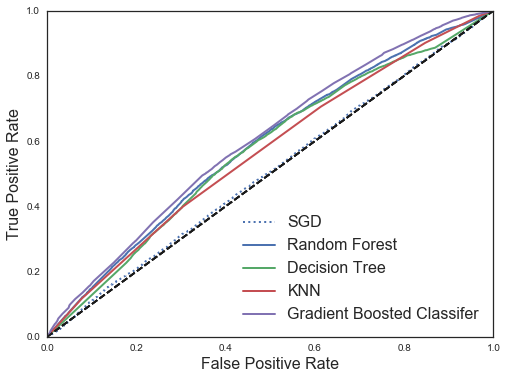

In [136]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plot_roc_curve(fpr_gbc, tpr_gbc, "Gradient Boosted Classifer")
plt.legend(loc="lower right", fontsize=16)
plt.show()

From this we can see Gradient Boosted Classifer is the best model for the dataset. 

In [137]:
precision_score(bike_labels, y_scores_gbc.round())

0.6235030925121726

In [138]:
recall_score(bike_labels, y_scores_gbc.round())

0.9112122571959741

In [139]:
f1_score(bike_labels, y_scores_gbc.round())

0.7403896239191582

In [140]:
confusion_matrix(bike_labels, y_scores_gbc.round())

array([[ 1880,  8583],
       [ 1385, 14214]])

In [141]:
tn, fp, fn, tp = confusion_matrix(bike_labels, y_scores_gbc.round()).ravel()
print("True Positives  (TP): ", tp)
print("False Positives (FP): ", fp)
print("True Negatives  (TN): ", tn)
print("False Negatives (FN): ", fn)

True Positives  (TP):  14214
False Positives (FP):  8583
True Negatives  (TN):  1880
False Negatives (FN):  1385


In [142]:
cost_ben = np.array([99, 0, -1, 0]).reshape(2,-1)
cost_ben

array([[99,  0],
       [-1,  0]])

In [143]:
conf_matrix = np.array([tp, fn, fp, tn]).reshape(2, -1)
conf_matrix

array([[14214,  1385],
       [ 8583,  1880]])

In [144]:
pos_prior = (tp+fn)/(tp+fn+tn+fp)
neg_prior = (fp+tn)/(tp+fn+tn+fp)
(pos_prior, neg_prior)

(0.5985342644463203, 0.4014657355536797)

In [145]:
tpr_gbc = tp/(tp+fn)
fpr_gbc = fp/(fp+tn)
tnr_gbc = tn/(tn+fp)
fnr_gbc = fn/(fn+tp)

In [146]:
rates = np.array([tpr_gbc, fnr_gbc, fpr_gbc, tnr_gbc]).reshape(2, -1)
rates

array([[0.9112, 0.0888],
       [0.8203, 0.1797]])

In [147]:
rates.dot(cost_ben)

array([[90.1212,  0.    ],
       [81.0319,  0.    ]])

In [148]:
rates.dot(cost_ben)[0,0]

90.1212257195974

In [149]:
expected_profit = pos_prior*(rates.dot(cost_ben)[0,0]+ rates.dot(cost_ben)[0,1])+neg_prior*(rates.dot(cost_ben)[1,0]+ rates.dot(cost_ben)[1,1])
expected_profit

86.47218172051262

-  AdaBoostClassifier<br>
5 fold CV Accuracy<br>
0.6117, 0.6236, 0.6206, 0.6178, 0.625



-  GradientBoostingClassifier<br>
method="decision_function"<br>
roc_auc_score: 0.6024957476100598<br>
method="predict_proba"<br>
roc_auc_score: 0.6024957476100598<br>
precision_score:0.6235030925121726<br>
recall_score: 0.9112122571959741<br><br>
f1_score:0.7403896239191582<br>
True Positives  (TP):  14214<br>
False Positives (FP):  8583<br>
True Negatives  (TN):  1880<br>
False Negatives (FN):  1385<br>